In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np

mnist = pd.read_csv("Data/mnist_784.csv", engine = 'python')

# MNIST Dataset Analysis

This notebook corresponds to B) 3. & 4.

## Analyze and describe the characteristics of the dataset

Much of the pre-processing has already been taken care of for us. The original digit images black and white (bilevel) were size normalized to fit in a 20x20 pixel box, preserving aspect ratio. The images were then centered in a 28x28 image by calculating the center of mass of the pixels, which was moved to the center of the 28x28 image. The csv contains pixel data, namely 784 pixels and a class label from 0-9.

We have a little less 5's than we would want to and a little more 2's, but overall it is quite balanced. Let's try and plot some of the images to get a feel for the data.

The data will **not** be normalized, because all the pixel values represent intensities, and they are all measured at the same scale (same unit), so the distance calculation makes sense.

In [2]:
mnist.info()
mnist.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to class
dtypes: int64(785)
memory usage: 419.2 MB


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0,4.452429
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0,2.890195
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0,9.000000


<AxesSubplot:xlabel='class', ylabel='Count'>

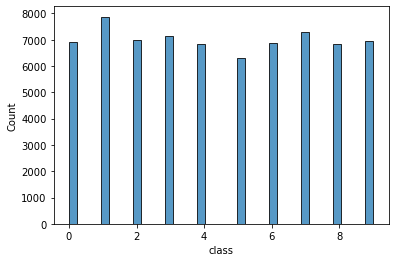

In [3]:
sns.histplot(mnist["class"])

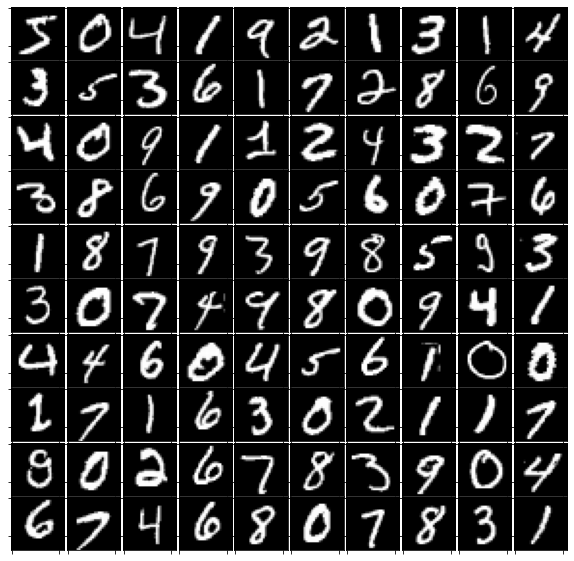

In [22]:
fig = plt.figure(figsize = (10, 10))
gs = gridspec.GridSpec(10, 10)
gs.update(wspace = 0.025, hspace = 0.025)
images = np.array(mnist.drop("class", axis = 1).head(100))
row = 0
for i, im in enumerate(images):
    col = i % 10
    if col == 0 and i != 0: row += 1
    ax = plt.subplot(gs[i])
    plt.axis('on')
    ax.imshow(im.reshape(28,28), cmap = "gray", vmin = 0, vmax = 255)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect('equal')

plt.savefig("Images/mnist_examples.png")
plt.show()

# Min Max scaling

for col in mnist.columns:
    if "class" not in col:
        minimum = mnist[col].min()
        maximum = mnist[col].max()
        if minimum != maximum:
            mnist[col] = (mnist[col] - minimum)/(maximum - minimum)

mnist["pixel1"].min()

# Converting to SOMLib format

We need to get it into the format:

INPUT VECTOR:

$TYPE inputvec
$XDIM <# of input vectors>
$YDIM 1
$VECDIM <# of features>
    
<feat 1> <feat 2> ... <name of input vector 1>
<feat 1> <feat 2> ... <name of input vector 2>


TEMPLATE VECTOR:

$TYPE template
$XDIM 7
$YDIM  <# of input vectors>
$VECDIM <# of features>
0 <name of feature 1> <df> <tf> <min_tf> <max_tf> <mean_tf>

1 <name of feature 2> <df> <tf> <min_tf> <max_tf> <mean_tf>
2 <name of feature 3> <df> <tf> <min_tf> <max_tf> <mean_tf>

:
:
:
<# of features - 1>  <name of feature n> <df> <tf> <min_tf> <max_tf> <mean_tf>
    
    

SOMLib Class Information File
Parameter Entries:

# Block of Comments: (optional) several lines of comments each starting with #
$NUM_CLASSES: <integer>, mandatory
Indicates the number of different classes
$CLASS_NAMES: list of strings, mandatory
A space-separated list of the class names
$XDIM: <integer>, mandatory
number of entities per line; fixed to 2
$YDIM: <integer>, mandatory
number of input vectors in file
The header above describes the general file structure.
Following this block, the second block contains a space-separated mapping vector label => class index
<VEC_ID_1> <CLASS_INDEX_VECTOR_1>
:::::::::::::::::::::::::::::::::::::::
<VEC_ID_n> <CLASS_INDEX_VECTOR_n>
The <VEC_ID_1> is of type string and denotes the label of the vector. <CLASS_INDEX> is of type <integer>, and gives the numerical index of the class, starting with 0 and in the order given in the header. Both fields are mandatory.


In [28]:
num_images = 2000

In [17]:

vec_label = "im"

with open("SOM/vector.in", "w") as f:
    f.write("$TYPE inputvec\n")
    f.write(f"$XDIM {num_images}\n")
    f.write("$YDIM 1\n")
    f.write("$VECDIM 784\n")
    for i, image in mnist.drop("class", axis = 1).head(num_images).iterrows():
        for value in image:
            f.write(f"{value} ")
        f.write(f"{vec_label}{i}\n")

        
with open("SOM/vector.tv", "w") as f:
    f.write("$TYPE template\n")
    f.write("$XDIM 7\n")
    f.write(f"$YDIM {num_images}\n")
    f.write("$VECDIM 784\n")
    for i, col in enumerate(mnist.columns):
        if "class" not in col:
            f.write(f"{i} {col} 1 1 1 1 1\n")
            
with open("SOM/class_info.cls", "w") as f:
    num_classes = 10
    f.write(f"$NUM_CLASSES {num_classes}\n")
    f.write("$CLASS_NAMES 0 1 2 3 4 5 6 7 8 9\n")
    f.write(f"$XDIM 2\n")
    f.write(f"$YDIM {num_images}\n")
    for i, cls in enumerate(mnist["class"].head(num_images)):
        f.write(f"{vec_label}{i} {cls}\n")

In [29]:
with open("SOM/class_info.cls", "w") as f:
    num_classes = 10
    f.write(f"$NUM_CLASSES {num_classes}\n")
    f.write("$CLASS_NAMES 0 1 2 3 4 5 6 7 8 9\n")
    f.write(f"$XDIM 2\n")
    f.write(f"$YDIM {num_images}\n")
    for i, cls in enumerate(mnist["class"].head(num_images)):
        f.write(f"{vec_label}{i} {cls}\n")

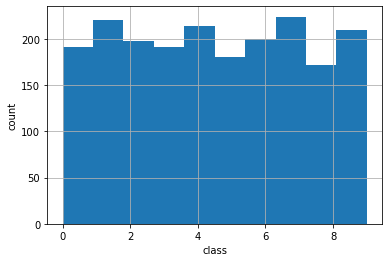

In [31]:
mnist["class"].head(num_images).hist()
#plt.title(f"Class distribution for a sample of {num_images} from the MNIST dataset")
plt.ylabel("count")
plt.xlabel("class")
plt.savefig("Images/som1_class_dist.png")